In [358]:
#pip install --upgrade scikit-learn

In [359]:
import pandas as pd
import numpy as pn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import mean_squared_error



In [360]:
Weather_focus=pd.read_csv("Weather Data2.csv")
Weather_focus.head()

,Day,Month,Year,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1,1,2012,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,1,2012,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1,1,2012,2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1,1,2012,3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1,1,2012,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [361]:
df=Weather_focus.join(Weather_focus.pop('Weather').str.split(',',expand=True)) 
Weather_focus_melted = pd.melt(df,id_vars=['Day','Month','Year','Time','Temp_C','Dew Point Temp_C','Rel Hum_%', 'Wind Speed_km/h',	'Visibility_km','Press_kPa'],value_name='weather_').dropna()
Weather_focus_melted_grouped = Weather_focus_melted.replace(['Moderate Rain Showers', 'Freezing Drizzle','Rain Showers','Heavy Rain Showers', 'Heavy Rain Showers', 'Ice Pellets', 
                'Moderate Rain', 'Freezing Rain', 'Drizzle', 'Blowing Snow', 'Snow Grains', 'Snow Pellets','Moderate Snow', 'Snow Showers', 
                'Freezing Fog', 'Mostly Cloudy', 'Mainly Clear'],['Rain','Rain','Rain','Rain','Rain','Rain','Rain','Rain','Rain', 'Snow',
                                                                  'Snow','Snow','Snow','Snow', 'Fog', 'Cloudy', 'Clear'])


In [362]:
Weather_focus_melted.head()

,Day,Month,Year,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,variable,weather_
0,1,1,2012,0:00,-1.8,-3.9,86,4,8.0,101.24,0,Fog
1,1,1,2012,1:00,-1.8,-3.7,87,4,8.0,101.24,0,Fog
2,1,1,2012,2:00,-1.8,-3.4,89,7,4.0,101.26,0,Freezing Drizzle
3,1,1,2012,3:00,-1.5,-3.2,88,6,4.0,101.27,0,Freezing Drizzle
4,1,1,2012,4:00,-1.5,-3.3,88,7,4.8,101.23,0,Fog


In [363]:
Weather_focus_melted_grouped.head()

,Day,Month,Year,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,variable,weather_
0,1,1,2012,0:00,-1.8,-3.9,86,4,8.0,101.24,0,Fog
1,1,1,2012,1:00,-1.8,-3.7,87,4,8.0,101.24,0,Fog
2,1,1,2012,2:00,-1.8,-3.4,89,7,4.0,101.26,0,Rain
3,1,1,2012,3:00,-1.5,-3.2,88,6,4.0,101.27,0,Rain
4,1,1,2012,4:00,-1.5,-3.3,88,7,4.8,101.23,0,Fog


In [364]:
Weather_focus_melted_grouped=Weather_focus_melted_grouped.drop('variable',axis=1)

In [365]:
Weather_focus_melted_grouped=Weather_focus_melted_grouped.drop(['Year'],axis=1)

In [366]:
Weather_focus_melted_grouped=Weather_focus_melted_grouped.drop(['Time'],axis=1)

In [367]:
Weather_focus_melted_grouped['weather_'].unique()


array(['Fog', 'Rain', 'Cloudy', 'Clear', 'Snow', 'Haze', 'Thunderstorms'],
      dtype=object)

In [368]:
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Clear':0 })
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Cloudy':1 })
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Fog':2 })
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Snow':3})
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Haze':4 })
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Rain':5})
Weather_focus_melted_grouped['weather_'] = Weather_focus_melted_grouped['weather_'].replace({'Thunderstorms':6})



In [369]:
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# Weather_focus_melted_grouped['weather_'] = labelencoder.fit_transform(Weather_focus_melted_grouped['weather_'])

# Weather_focus_melted_grouped.head()

In [370]:
Weather_focus_melted_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 26115
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Day               9183 non-null   int64  
 1   Month             9183 non-null   int64  
 2   Temp_C            9183 non-null   float64
 3   Dew Point Temp_C  9183 non-null   float64
 4   Rel Hum_%         9183 non-null   int64  
 5   Wind Speed_km/h   9183 non-null   int64  
 6   Visibility_km     9183 non-null   float64
 7   Press_kPa         9183 non-null   float64
 8   weather_          9183 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 717.4 KB


In [371]:
Weather_focus_melted_grouped.isnull().sum()

Day                 0
Month               0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
weather_            0
dtype: int64

In [372]:
Weather_focus_melted_grouped.head()

,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_
0,1,1,-1.8,-3.9,86,4,8.0,101.24,2
1,1,1,-1.8,-3.7,87,4,8.0,101.24,2
2,1,1,-1.8,-3.4,89,7,4.0,101.26,5
3,1,1,-1.5,-3.2,88,6,4.0,101.27,5
4,1,1,-1.5,-3.3,88,7,4.8,101.23,2


In [374]:
Weather_focus_melted_grouped.duplicated().sum()

28

In [375]:
Weather_focus_melted_grouped.shape

(9183, 9)

In [376]:
Weather_focus_melted_grouped.describe()

,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_
count,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000
mean,15.773821,6.579658,8.612316,2.582489,68.461287,15.024828,26.755091,101.023149,1.206468
std,8.814796,3.489934,11.594674,10.786003,17.279368,8.730259,13.095163,0.852590,1.501707
min,1.000000,1.000000,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,0.000000
25%,8.000000,4.000000,0.100000,-5.700000,56.000000,9.000000,24.100000,100.530000,0.000000
50%,16.000000,7.000000,8.800000,3.200000,69.000000,13.000000,25.000000,101.050000,1.000000
75%,23.000000,10.000000,18.600000,11.700000,83.000000,20.000000,25.000000,101.560000,1.000000
max,31.000000,12.000000,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,6.000000


<AxesSubplot:xlabel='count', ylabel='weather_'>

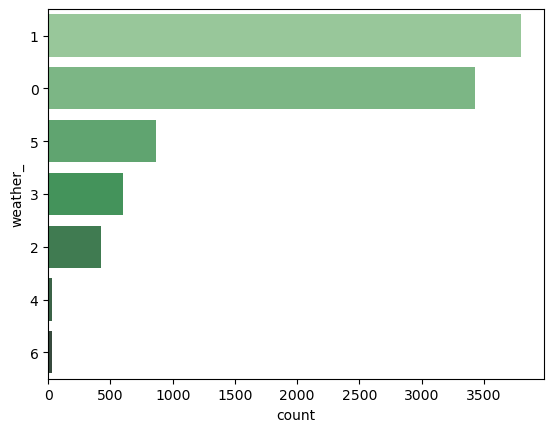

In [377]:
sns.countplot(y="weather_", data=Weather_focus_melted_grouped, palette="Greens_d",
              order=Weather_focus_melted_grouped.weather_.value_counts().iloc[:12].index)

In [378]:
Weather_focus_melted_grouped['weather_']

0        2
1        2
2        5
3        5
4        2
        ..
26093    5
26111    2
26112    2
26114    2
26115    2
Name: weather_, Length: 9183, dtype: int64

weather_
0    10.343823
1     9.389334
2     4.915962
3    -4.145364
4    -1.224138
5     9.026037
6    20.225926
Name: Temp_C, dtype: float64


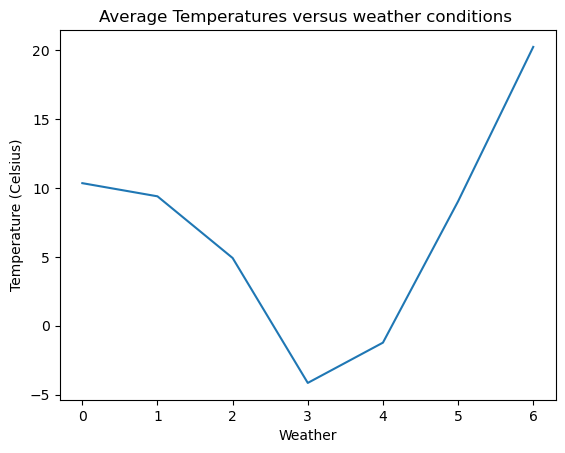

weather_
0     2.846008
1     2.787411
2     3.797418
3    -7.010265
4    -3.951724
5     6.469585
6    17.748148
Name: Dew Point Temp_C, dtype: float64


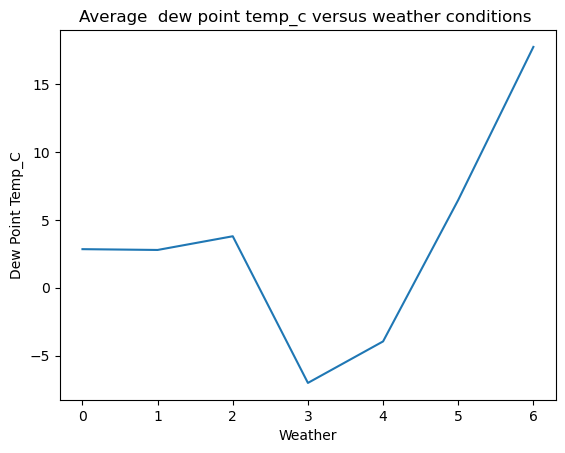

weather_
0    62.147145
1    65.511193
2    92.521127
3    80.887417
4    81.724138
5    84.885945
6    86.074074
Name: Rel Hum_%, dtype: float64


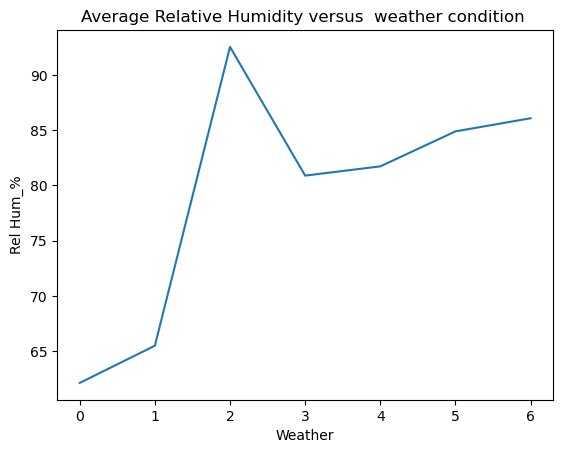

weather_
0    12.758741
1    15.956545
2    12.086854
3    20.932119
4     9.413793
5    17.368664
6    16.925926
Name: Wind Speed_km/h, dtype: float64


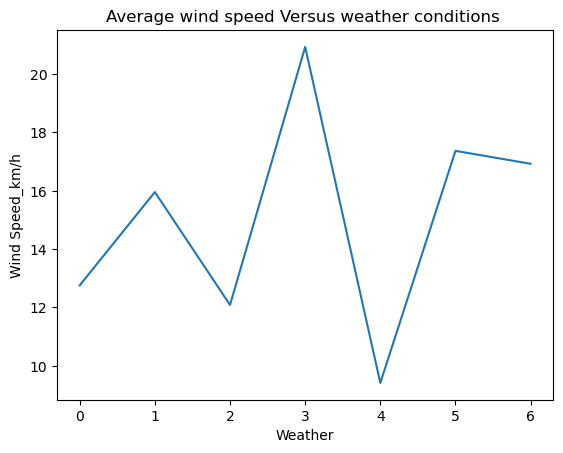

In [406]:
monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Temperature (Celsius)")
plt.title("Average Temperatures versus weather conditions ")
plt.show()

monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Dew Point Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Dew Point Temp_C")
plt.title("Average  dew point temp_c versus weather conditions ")
plt.show()


monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Rel Hum_%"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Rel Hum_%")
plt.title("Average Relative Humidity versus  weather condition ")
plt.show()

monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Wind Speed_km/h"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Wind Speed_km/h")
plt.title("Average wind speed Versus weather conditions ")
plt.show()

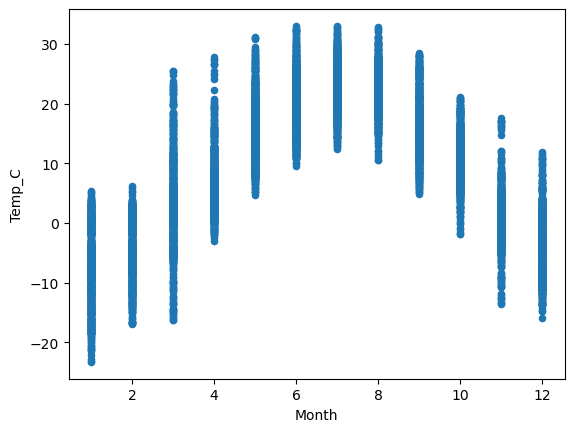

In [381]:
r2=Weather_focus_melted_grouped.plot.scatter("Month","Temp_C")

<Figure size 1200x1000 with 0 Axes>

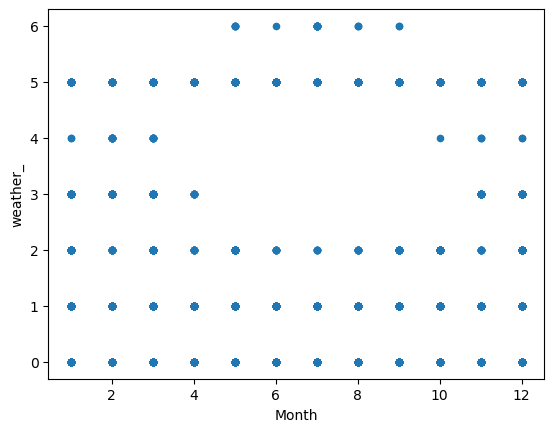

In [382]:
plt.figure(figsize=(12,10))
r=Weather_focus_melted_grouped.plot.scatter("Month","weather_")

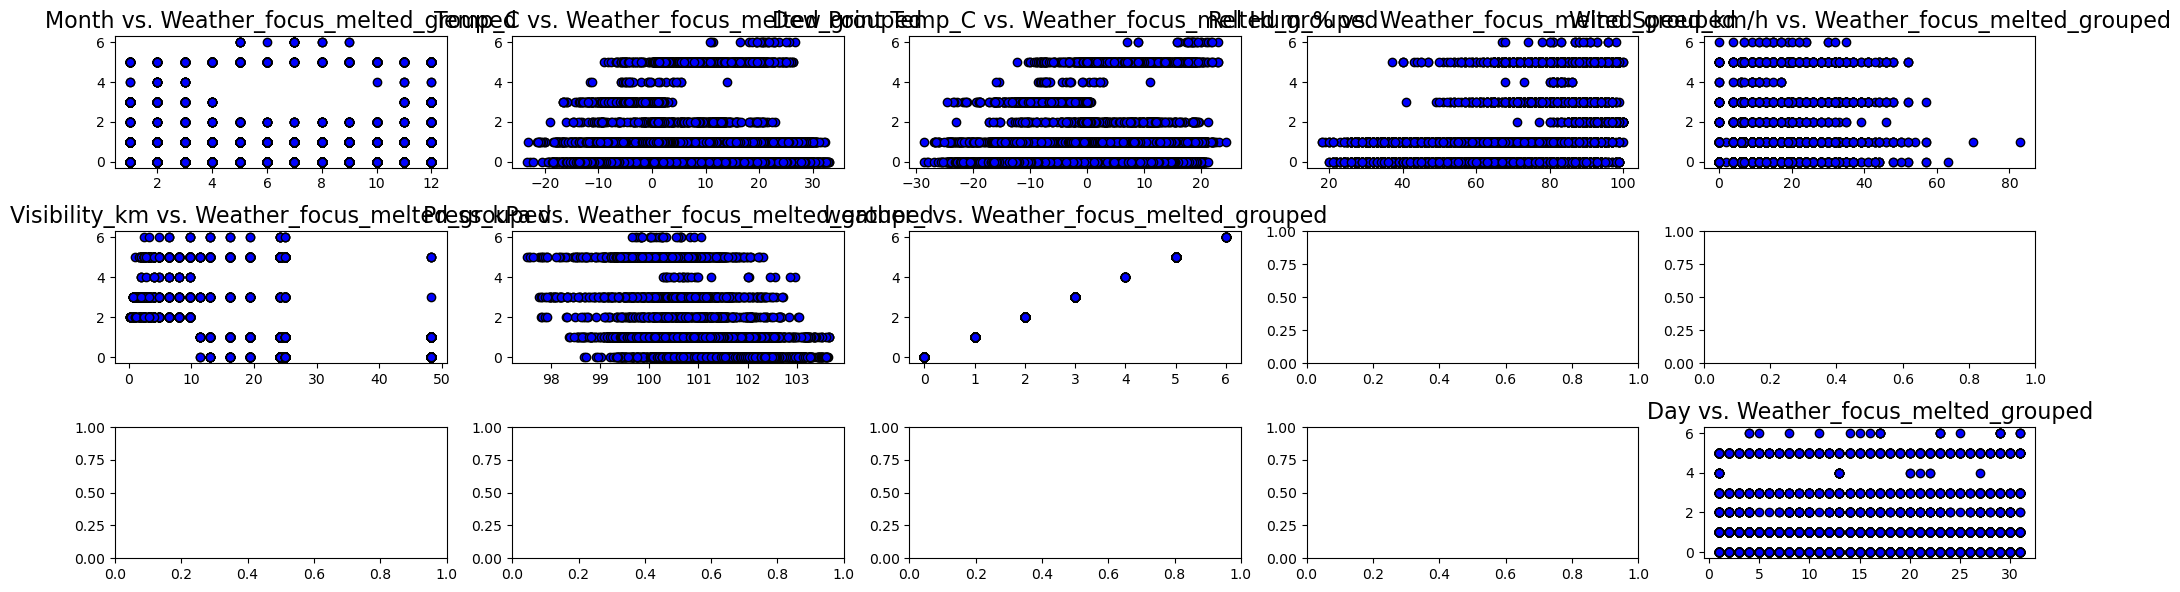

In [383]:
fig, axs = plt.subplots(3,5, figsize=(20,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(Weather_focus_melted_grouped.columns):
    axs[index-1].set_title("{} vs. Weather_focus_melted_grouped".format(column),fontsize=16)
    axs[index-1].scatter(x=Weather_focus_melted_grouped[column],y=Weather_focus_melted_grouped['weather_'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

In [384]:
#print("unique Temp_C",Weather_focus['Temp_C'].value_counts().unique())
print("mean of unique Temp_C ",Weather_focus_melted_grouped['Temp_C'].value_counts().unique().mean())

#print("unique Dew Point Temp_C",Weather_focus['Dew Point Temp_C'].value_counts().unique())
print("mean of unique Dew Point Temp_C ",Weather_focus_melted_grouped['Dew Point Temp_C'].value_counts().unique().mean())

#print("unique Rel Hum_%",Weather_focus['Rel Hum_%'].value_counts().unique())
print("mean of unique Rel Hum_% ",Weather_focus_melted_grouped['Rel Hum_%'].value_counts().unique().mean())

#print("unique Wind Speed_km/h",Weather_focus['Wind Speed_km/h'].value_counts().unique())
print("mean of unique Wind Speed_km/h ",Weather_focus_melted_grouped['Wind Speed_km/h'].value_counts().unique().mean())

#print("unique Visibility_km",Weather_focus['Visibility_km'].value_counts().unique())
print("mean of unique Visibility_km ",Weather_focus_melted_grouped['Visibility_km'].value_counts().unique().mean())

#print("unique Press_kPa",Weather_focus['Press_kPa'].value_counts().unique())
print("mean of unique Press_kPa ",Weather_focus_melted_grouped['Press_kPa'].value_counts().unique().mean())

mean of unique Temp_C  27.0
mean of unique Dew Point Temp_C  26.5
mean of unique Rel Hum_%  107.83098591549296
mean of unique Wind Speed_km/h  305.56666666666666
mean of unique Visibility_km  382.625
mean of unique Press_kPa  29.810344827586206


Month
1     -7.210622
2     -4.174721
3      3.071282
4      6.955116
5     16.025508
6     20.094650
7     22.755774
8     22.262069
9     16.357392
10    10.897580
11     0.933148
12    -2.948832
Name: Temp_C, dtype: float64


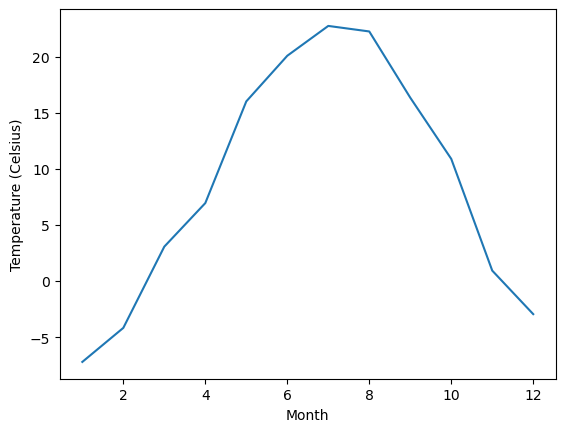

Month
1     -7.210622
2     -4.174721
3      3.071282
4      6.955116
5     16.025508
6     20.094650
7     22.755774
8     22.262069
9     16.357392
10    10.897580
11     0.933148
12    -2.948832
Name: Temp_C, dtype: float64


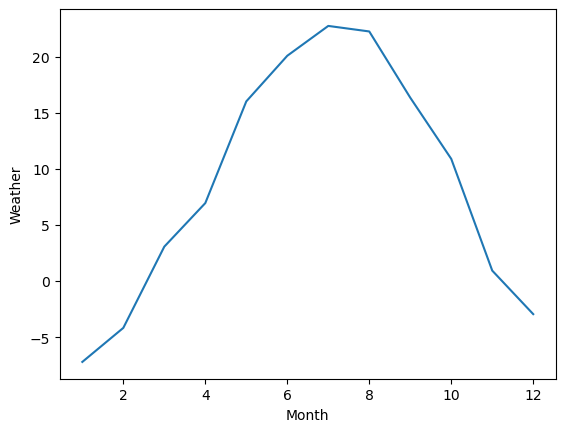

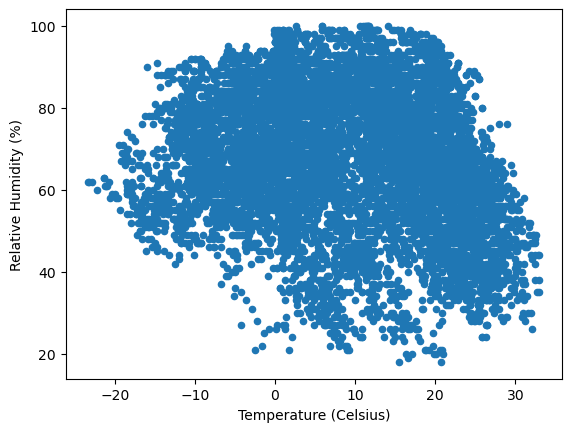

In [385]:
monthly_temp = Weather_focus_melted_grouped.groupby("Month")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.show()



monthly_weather = Weather_focus_melted_grouped.groupby("Month")["weather_"]
print(monthly_temp)


#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa '
monthly_temp.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Weather")
plt.show()



Weather_focus_melted_grouped.plot(x="Temp_C", y="Rel Hum_%", kind="scatter")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Relative Humidity (%)")
plt.show()





# plt.figure(figsize=(12,10))

# sns.countplot(y = 'weather_',data = Weather_focus_melted_grouped)
# plt.xlabel("Count",fontweight='bold',size=14)
# plt.ylabel("Weather Condition",fontweight='bold',size=14)
# plt.title("occurrance(times) of weather conditions")
# plt.show()

Day
1      7.714286
2      8.800990
3      8.957931
4      8.894771
5      7.838966
6      7.607612
7      8.866897
8      8.779299
9      8.329392
10     8.206731
11     7.021034
12     9.029795
13     9.305333
14     8.303145
15     8.420068
16     8.394737
17     9.497476
18     9.389262
19     9.037658
20    10.061246
21    10.321753
22    10.187541
23     9.960535
24     9.329655
25     8.563265
26     7.194863
27     6.593506
28     7.666212
29     7.153526
30     8.484211
31     9.336207
Name: Temp_C, dtype: float64


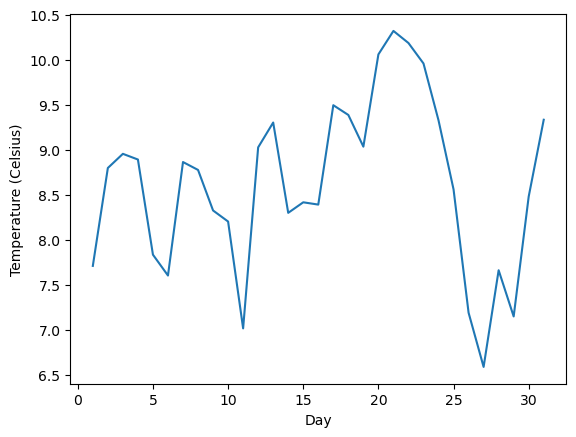

             Day     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Month                                                                       
1      16.073834  -7.210622        -12.041451  68.937824        18.221503   
2      14.892458  -4.174721         -9.094274  69.398045        14.807263   
3      15.928205   3.071282         -3.282821  66.147436        14.375641   
4      15.641201   6.955116         -1.864802  56.698499        17.478854   
5      15.609137  16.025508          8.220939  63.262690        12.746193   
6      15.462277  20.094650         11.774074  60.964335        14.672154   
7      16.090551  22.755774         14.711024  62.666667        12.028871   
8      15.942971  22.262069         15.692838  68.236074        14.035809   
9      15.856183  16.357392         10.791263  71.944892        14.158602   
10     15.750318  10.897580          6.669682  76.756688        15.338854   
11     15.484050   0.933148         -4.175173  69.995839        13.977809   

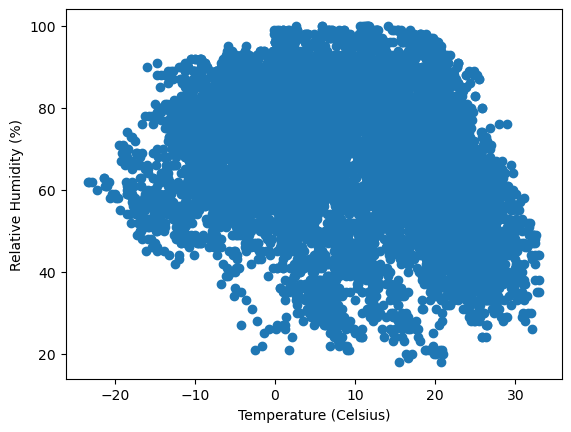

Month
1     -7.210622
2     -4.174721
3      3.071282
4      6.955116
5     16.025508
6     20.094650
7     22.755774
8     22.262069
9     16.357392
10    10.897580
11     0.933148
12    -2.948832
Name: Temp_C, dtype: float64


In [386]:
monthly_temp = Weather_focus_melted_grouped.groupby("Day")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Day")
plt.ylabel("Temperature (Celsius)")
plt.show()

monthly_data = Weather_focus_melted_grouped.groupby('Month').mean()
print(monthly_data)



plt.scatter(Weather_focus_melted_grouped['Temp_C'], Weather_focus_melted_grouped['Rel Hum_%'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.show()

monthly_temp = Weather_focus_melted_grouped.groupby("Month")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
# monthly_temp.plot(kind="line")
# plt.xlabel("Month")
# plt.ylabel("Temperature (Celsius)")
# plt.show()

# print("correlation ",Weather_focus_melted_grouped.corr())




2012 unique Recorded wind speed: [ 4  7  6  9 15 13 20 22 19 24 30 35 39 32 33 26 44 43 48 37 28 17 11  0
 83 70 57 46 41 52 50 63 54  2]
Max Wind Speed: 83
Min Wind Speed: 0
Average Wind Speed: 15.024828487422411


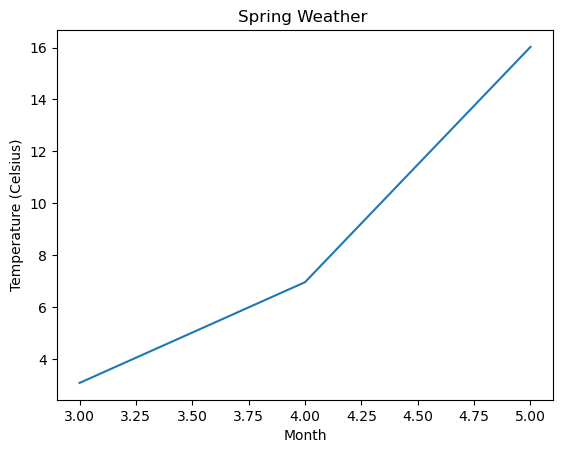

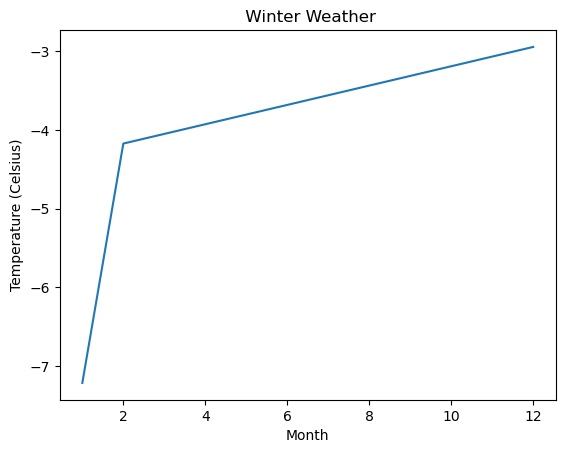

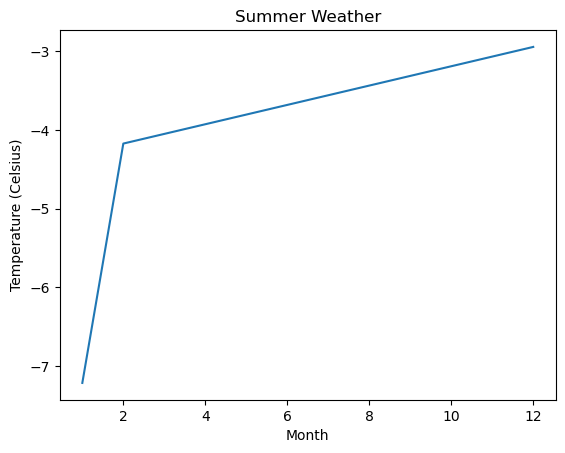

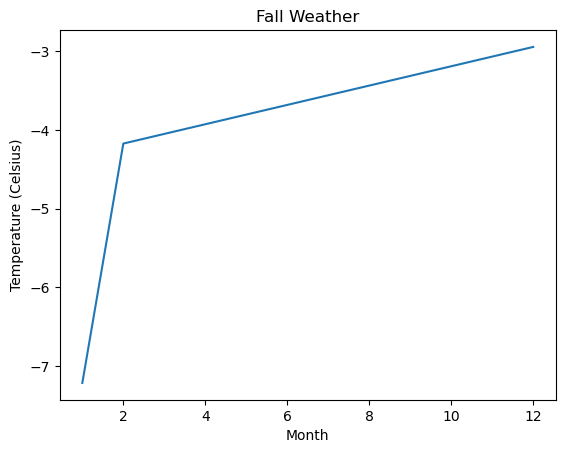

Months with  2 [ 1  2  3  4  5  7  8  9 10 11 12  6]
Months with  5 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  1 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  0 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  3 [ 1  2  3  4 11 12]
Months with  4 [ 1  2  3 10 11 12]
Months with  6 [5 6 7 8 9]


In [408]:
#find all unique wind speed recorded in 2021
d=Weather_focus_melted_grouped['Wind Speed_km/h'].unique()
print('2012 unique Recorded wind speed:',d)

max_wind= Weather_focus_melted_grouped['Wind Speed_km/h'].max()
print('Max Wind Speed:',max_wind)

min_wind= Weather_focus_melted_grouped['Wind Speed_km/h'].min()
print('Min Wind Speed:',min_wind)

avg_wind= Weather_focus_melted_grouped['Wind Speed_km/h'].mean()
print('Average Wind Speed:',avg_wind)

#Spring weather
Spring = Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==3) | (Weather_focus_melted_grouped['Month']==4) | (Weather_focus_melted_grouped['Month']==5)]
Spring

mvst = Spring.groupby("Month")["Temp_C"].mean()

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
mvst.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title("Spring Weather ")
plt.show()

#Winter Weather 
Winter= Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==12) | (Weather_focus_melted_grouped['Month']==1) | (Weather_focus_melted_grouped['Month']==2)]
Winter

Winter_Vis = Winter.groupby("Month")["Temp_C"].mean()
Winter_Vis.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title(" Winter Weather")
plt.show()

Summer= Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==6) | (Weather_focus_melted_grouped['Month']==7) | (Weather_focus_melted_grouped['Month']==8)]
Summer

Summer_Vis = Winter.groupby("Month")["Temp_C"].mean()
Summer_Vis.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title("Summer Weather")
plt.show()

Fall= Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==9) | (Weather_focus_melted_grouped['Month']==10) | (Weather_focus_melted_grouped['Month']==11)]
Fall

Fall_Vis = Winter.groupby("Month")["Temp_C"].mean()
Fall_Vis.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title("Fall Weather")
plt.show()



Uni_weather=Weather_focus_melted_grouped['weather_'].unique()

for values in Uni_weather:

  Weather_Cond=Weather_focus_melted_grouped[(Weather_focus_melted_grouped['weather_']  == values)]
  Val=Weather_Cond['Month'].unique()
  print('Months with ',values,Val)


                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.930534  -0.227757        -0.069560   
Dew Point Temp_C  0.930534          1.000000   0.137573        -0.099882   
Rel Hum_%        -0.227757          0.137573   1.000000        -0.078795   
Wind Speed_km/h  -0.069560         -0.099882  -0.078795         1.000000   
Visibility_km     0.282028          0.046556  -0.664787        -0.006830   
Press_kPa        -0.211746         -0.305551  -0.256859        -0.356373   

                  Visibility_km  Press_kPa  
Temp_C                 0.282028  -0.211746  
Dew Point Temp_C       0.046556  -0.305551  
Rel Hum_%             -0.664787  -0.256859  
Wind Speed_km/h       -0.006830  -0.356373  
Visibility_km          1.000000   0.262534  
Press_kPa              0.262534   1.000000  


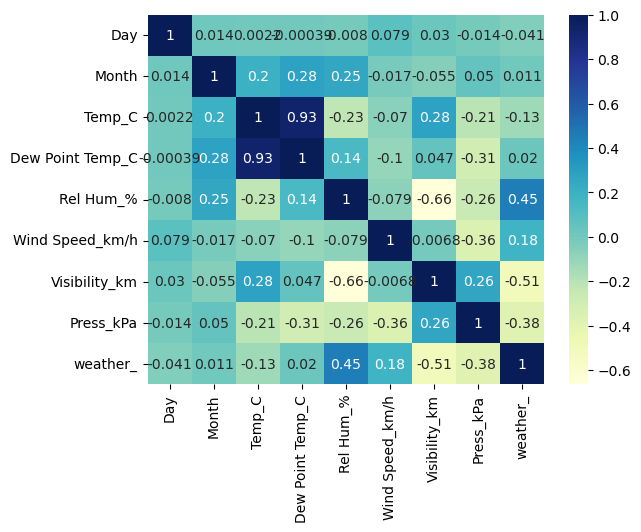

In [388]:
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap(Weather_focus_melted_grouped.corr(), cmap="YlGnBu", annot=True)

print(Weather_focus_melted_grouped[["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]].corr())

In [389]:
# import seaborn as sns
# plt.figure(figsize=(18,6))
# sns.pairplot(Weather_focus_melted_grouped.drop('Time',axis=1),hue='Weather')
# plt.show()

In [390]:
order=Weather_focus_melted_grouped.weather_.value_counts().iloc[:12].index
for values in order:

  Weather_Cond=Weather_focus[(Weather_focus_melted_grouped['weather_']  == values)]
  Val=Weather_Cond['Month'].unique()
  print('Months with ',values,Val)

Months with  1 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  0 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  5 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  3 [ 1  2  3  4 11 12]
Months with  2 [ 1  2  3  4  5  7  8  9 10 11 12]
Months with  4 [ 1  2  3 10 11 12]
Months with  6 [5 6 7 8 9]


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_31829/2304808990.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Weather_Cond=Weather_focus[(Weather_focus_melted_grouped['weather_']  == values)]


In [391]:
order

Int64Index([1, 0, 5, 3, 2, 4, 6], dtype='int64')

##MODEL

In [392]:
Weather_focus_melted_grouped.head()

,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_
0,1,1,-1.8,-3.9,86,4,8.0,101.24,2
1,1,1,-1.8,-3.7,87,4,8.0,101.24,2
2,1,1,-1.8,-3.4,89,7,4.0,101.26,5
3,1,1,-1.5,-3.2,88,6,4.0,101.27,5
4,1,1,-1.5,-3.3,88,7,4.8,101.23,2


In [394]:
#Split train and target features
X=Weather_focus_melted_grouped.drop('weather_',axis=1)
y=Weather_focus_melted_grouped['weather_']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=123)






In [409]:
# Create the Logistic Regression model
lr = RandomForestClassifier()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7356271777003485


In [395]:
# # #defining the dataset
# X,y= make_classification(n_samples = 9000,n_classes=7,n_informative=16,scale=2.0)

# #class destribution

print(Counter(y))

Counter({1: 3797, 0: 3432, 5: 868, 3: 604, 2: 426, 4: 29, 6: 27})


In [397]:
# instantiating the random over sampler 
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=123)
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))
# # Counter({0: 9844, 1: 9844})

Counter({2: 3797, 5: 3797, 1: 3797, 0: 3797, 3: 3797, 4: 3797, 6: 3797})


In [ ]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [410]:
# Define the pipeline
# pipe = make_pipeline(KNeighborsClassifier(n_neighbors=8,weights='uniform',n_jobs=16))#KNeighborsClassifier(n_neighbors=5))#DecisionTreeClassifier())#RandomForestClassifier())#DecisionTreeClassifier()
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=10,random_state=123,criterion='entropy'))
# np.random.seed(42)
pipe.fit(X_ros, y_ros)

y_pred = pipe.predict(X_train)
y_pred
y_pred1 = pipe.predict(X_test)
y_pred1
X_ros

,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,1,1,-1.800000,-3.900000,86,4,8.000000,101.240000
1,1,1,-1.800000,-3.700000,87,4,8.000000,101.240000
2,1,1,-1.800000,-3.400000,89,7,4.000000,101.260000
3,1,1,-1.500000,-3.200000,88,6,4.000000,101.270000
4,1,1,-1.500000,-3.300000,88,7,4.800000,101.230000
...,...,...,...,...,...,...,...,...
26574,9,7,23.880676,21.464671,86,22,16.185360,100.591464
26575,29,5,20.897324,17.465775,80,14,10.795210,99.780803
26576,17,7,20.476777,19.183589,92,15,3.675540,99.956502
26577,29,5,20.888254,17.462751,80,14,10.891955,99.783524


In [399]:
print('training set ',classification_report(y_train,y_pred))
print('test set ',classification_report(y_test,y_pred1))


training set                precision    recall  f1-score   support

           0       0.99      1.00      0.99      2574
           1       0.99      0.99      0.99      2869
           2       0.69      0.68      0.69       323
           3       0.91      0.91      0.91       456
           4       0.81      0.81      0.81        21
           5       0.80      0.80      0.80       625
           6       0.50      0.53      0.51        19

    accuracy                           0.95      6887
   macro avg       0.81      0.82      0.82      6887
weighted avg       0.95      0.95      0.95      6887

test set                precision    recall  f1-score   support

           0       0.99      1.00      0.99       858
           1       1.00      0.99      0.99       928
           2       0.62      0.67      0.64       103
           3       0.88      0.90      0.89       148
           4       0.67      0.75      0.71         8
           5       0.84      0.80      0.82       243


In [400]:
print(y_test.shape)
print(y_pred1.shape)

(2296,)
(2296,)


In [401]:
print(y_train.shape)
print(y_pred.shape)

(6887,)
(6887,)


In [402]:
Weather_focus_melted_grouped['weather_']

0        2
1        2
2        5
3        5
4        2
        ..
26093    5
26111    2
26112    2
26114    2
26115    2
Name: weather_, Length: 9183, dtype: int64

In [403]:
rmse_train = pn.sqrt(mean_squared_error(y_train, y_pred))
rmse_train

0.5414434670617173

In [404]:
rmse_test = pn.sqrt(mean_squared_error(y_test, y_pred1))
rmse_test

0.5521576303742327